In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

# **Height Width and Channels**

In [ ]:
IMG_WIDTH=256
IMG_HEIGHT=256
IMG_CHANNELS=12

In [ ]:
s=[]
import os
for root, dirs, files in os.walk("/content/drive/My Drive/RadiantML/Train data"):
    for file in files:
        if file.endswith(".pkl"):
             s.append(os.path.join(root, file))

In [ ]:
s.sort()

In [ ]:
len(s)

99

# **Preprocessing the data**

In [ ]:
import pickle
import numpy as np
import pandas as pd
train=[]
for i in s:
  df = pd.read_pickle(r'{}'.format(i))
  df1=pd.DataFrame(df[0])
  df2=pd.DataFrame(df[1])
  df3=pd.DataFrame(df[2])
  df4=pd.DataFrame(df[3])
  df5=pd.DataFrame(df[4])
  df6=pd.DataFrame(df[5])
  df7=pd.DataFrame(df[6])
  df8=pd.DataFrame(df[7])
  df9=pd.DataFrame(df[8])
  df10=pd.DataFrame(df[9])
  df11=pd.DataFrame(df[10])
  df12=pd.DataFrame(df[11])
  a=np.dstack([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])
  train.append(a)

In [ ]:
len(train)

99

In [ ]:
X=np.array(train)

In [ ]:
s=[]
import os
for root, dirs, files in os.walk("/content/drive/My Drive/RadiantML/labels"):
    for file in files:
        if file.endswith(".tif"):
             s.append(os.path.join(root, file))

In [ ]:
s.sort()

In [ ]:
d=[]
import gdal
for i in s:
   img = gdal.Open('{}'.format(i))
   img_np= img.GetRasterBand(1).ReadAsArray()
   d.append(img_np)


In [ ]:
Y=np.array(d)

In [ ]:
Y.shape

(99, 256, 256)

# **Augmenting the data**

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.ndimage import rotate
sns.set(color_codes=True)
def rotate_img(img, angle, bg_patch=(5,5)):
    assert len(img.shape) <= 3, "Incorrect image shape"
    rgb = len(img.shape) == 3
    if rgb:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1], :], axis=(0,1))
    else:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1]])
    img = rotate(img, angle, reshape=False)
    mask = [img <= 0, np.any(img <= 0, axis=-1)][rgb]
    img[mask] = bg_color
    return img

In [ ]:
X_rotate=[]
Y_rotate=[]
for i in range(len(X)):
  X_rotate.append(rotate_img(X[i],90, bg_patch=(5,5)))
  Y_rotate.append(rotate_img(Y[i],90, bg_patch=(5,5)))
X_rotate=np.array(X_rotate)
Y_rotate=np.array(Y_rotate)


In [ ]:
def translate(img, shift=10, direction='right', roll=True):
    assert direction in ['right', 'left', 'down', 'up'], 'Directions should be down|up|left|right'
    img = img.copy()
    if direction == 'right':
        right_slice = img[:, -shift:].copy()
        img[:, shift:] = img[:, :-shift]
        if roll:
            img[:,:shift] = np.fliplr(right_slice)
    if direction == 'left':
        left_slice = img[:, :shift].copy()
        img[:, :-shift] = img[:, shift:]
        if roll:
            img[:, -shift:] = left_slice
    if direction == 'down':
        down_slice = img[-shift:, :].copy()
        img[shift:, :] = img[:-shift,:]
        if roll:
            img[:shift, :] = down_slice
    if direction == 'up':
        upper_slice = img[:shift, :].copy()
        img[:-shift, :] = img[shift:, :]
        if roll:
            img[-shift:,:] = upper_slice
    return img

In [ ]:
X_translate_l=[]
Y_translate_l=[]
for i in range(len(X)):
  X_translate_l.append(translate(X[i],shift=50, direction='left', roll=True))
  Y_translate_l.append(translate(Y[i],shift=50, direction='left', roll=True))
X_translate_l=np.array(X_translate_l)
Y_translate_l=np.array(Y_translate_l)

In [ ]:
X_translate_r=[]
Y_translate_r=[]
for i in range(len(X)):
  X_translate_r.append(translate(X[i],shift=50, direction='right', roll=True))
  Y_translate_r.append(translate(Y[i],shift=50, direction='right', roll=True))
X_translate_r=np.array(X_translate_r)
Y_translate_r=np.array(Y_translate_r)

In [ ]:
X_translate_u=[]
Y_translate_u=[]
for i in range(len(X)):
  X_translate_u.append(translate(X[i],shift=50, direction='up', roll=True))
  Y_translate_u.append(translate(Y[i],shift=50, direction='up', roll=True))
X_translate_u=np.array(X_translate_u)
Y_translate_u=np.array(Y_translate_u)

In [ ]:
X_translate_d=[]
Y_translate_d=[]
for i in range(len(X)):
  X_translate_d.append(translate(X[i],shift=50, direction='down', roll=True))
  Y_translate_d.append(translate(Y[i],shift=50, direction='down', roll=True))
X_translate_d=np.array(X_translate_d)
Y_translate_d=np.array(Y_translate_d)

In [ ]:
X_train=np.vstack([X,X_rotate,X_translate_d,X_translate_l,X_translate_r,X_translate_u])

In [ ]:
X_train.shape

(594, 256, 256, 12)

In [ ]:
Y_train=np.vstack([Y,Y_rotate,Y_translate_d,Y_translate_l,Y_translate_r,Y_translate_u])

In [ ]:
Y_train.shape

(594, 256, 256)

In [ ]:
X=X_train
Y=Y_train

In [ ]:
from sklearn.model_selection import train_test_split
import random
import math
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.1)

In [ ]:
y_test.shape

(60, 256, 256)

In [ ]:
del X
del X_rotate
del X_translate_d
del X_translate_l
del X_translate_r
del X_translate_u

In [ ]:
del Y_translate_d
del Y_translate_l
del Y_translate_r
del Y_translate_u
del Y_rotate
del Y

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train,8)
y_test = tf.keras.utils.to_categorical(y_test,8)

In [ ]:
del Y_train

In [ ]:
y_train.shape

(594, 256, 256, 8)

In [ ]:
inputs=tf.keras.layers.Input((IMG_WIDTH,IMG_HEIGHT,IMG_CHANNELS))
s=tf.keras.layers.Lambda(lambda x:x/255)(inputs)

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Activation, Add
def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
  x = Conv2D(filters, size, strides=strides, padding=padding)(x)
  x = BatchNormalization()(x)
  if activation == True:
      x = Activation('relu')(x)
  return x

def residual_block(blockInput, num_filters=16):
  x = Activation('relu')(blockInput)
  x = BatchNormalization()(x)
  x = convolution_block(x, num_filters, (3,3) )
  x = convolution_block(x, num_filters, (3,3), activation=False)
  x = Add()([x, blockInput])
  return x

# Build model
def build_model(input_layer, start_neurons, DropoutRatio = 0.5):
# 101 -> 50
  conv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(input_layer)
  conv1 = residual_block(conv1,start_neurons * 1)
  conv1 = residual_block(conv1,start_neurons * 1)
  conv1 = Activation('relu')(conv1)
  pool1 = MaxPooling2D((2, 2))(conv1)
  pool1 = Dropout(DropoutRatio/2)(pool1)

# 50 -> 25
  conv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(pool1)
  conv2 = residual_block(conv2,start_neurons * 2)
  conv2 = residual_block(conv2,start_neurons * 2)
  conv2 = Activation('relu')(conv2)
  pool2 = MaxPooling2D((2, 2))(conv2)
  pool2 = Dropout(DropoutRatio)(pool2)

# 25 -> 12
  conv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(pool2)
  conv3 = residual_block(conv3,start_neurons * 4)
  conv3 = residual_block(conv3,start_neurons * 4)
  conv3 = Activation('relu')(conv3)
  pool3 = MaxPooling2D((2, 2))(conv3)
  pool3 = Dropout(DropoutRatio)(pool3)

# 12 -> 6
  conv4 = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(pool3)
  conv4 = residual_block(conv4,start_neurons * 8)
  conv4 = residual_block(conv4,start_neurons * 8)
  conv4 = Activation('relu')(conv4)
  pool4 = MaxPooling2D((2, 2))(conv4)
  pool4 = Dropout(DropoutRatio)(pool4)

# Middle
  convm = Conv2D(start_neurons * 16, (3, 3), activation=None, padding="same")(pool4)
  convm = residual_block(convm,start_neurons * 16)
  convm = residual_block(convm,start_neurons * 16)
  convm = Activation('relu')(convm)

# 6 -> 12
  deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(convm)
  uconv4 = concatenate([deconv4, conv4])
  uconv4 = Dropout(DropoutRatio)(uconv4)

  uconv4 = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(uconv4)
  uconv4 = residual_block(uconv4,start_neurons * 8)
  uconv4 = residual_block(uconv4,start_neurons * 8)
  uconv4 = Activation('relu')(uconv4)

# 12 -> 25
  deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
  #deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="valid")(uconv4)
  uconv3 = concatenate([deconv3, conv3])    
  uconv3 = Dropout(DropoutRatio)(uconv3)

  uconv3 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv3)
  uconv3 = residual_block(uconv3,start_neurons * 4)
  uconv3 = residual_block(uconv3,start_neurons * 4)
  uconv3 = Activation('relu')(uconv3)

# 25 -> 50
  deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
  uconv2 = concatenate([deconv2, conv2])

  uconv2 = Dropout(DropoutRatio)(uconv2)
  uconv2 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv2)
  uconv2 = residual_block(uconv2,start_neurons * 2)
  uconv2 = residual_block(uconv2,start_neurons * 2)
  uconv2 = Activation('relu')(uconv2)

# 50 -> 101
  deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
  #deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="valid")(uconv2)
  uconv1 = concatenate([deconv1, conv1])

  uconv1 = Dropout(DropoutRatio)(uconv1)
  uconv1 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv1)
  uconv1 = residual_block(uconv1,start_neurons * 1)
  uconv1 = residual_block(uconv1,start_neurons * 1)
  uconv1 = Activation('relu')(uconv1)

  uconv1 = Dropout(DropoutRatio/2)(uconv1)
  output_layer = Conv2D(8, (1,1), padding="same", activation="softmax")(uconv1)

  return output_layer

In [ ]:
outputs=build_model(s,16, DropoutRatio = 0.5)

In [ ]:
model4 = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 12 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 256, 256, 12) 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 1744        lambda[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 16) 0           conv2d[0][0]                     
_______________________________________________________________________________________

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model1_for_segmentation.h5', verbose=1, save_best_only=True)
callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_accuracy'),checkpointer]
results = model4.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, callbacks=callbacks)

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 3.1892 - accuracy: 0.2207 
Epoch 00001: val_loss improved from inf to 1.92387, saving model to model1_for_segmentation.h5
15/15 [==============================] - 158s 11s/step - loss: 3.1892 - accuracy: 0.2207 - val_loss: 1.9239 - val_accuracy: 0.2997
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 1.7061 - accuracy: 0.3743
Epoch 00002: val_loss improved from 1.92387 to 1.70221, saving model to model1_for_segmentation.h5
15/15 [==============================] - 153s 10s/step - loss: 1.7061 - accuracy: 0.3743 - val_loss: 1.7022 - val_accuracy: 0.5019
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 1.5554 - accuracy: 0.4247
Epoch 00003: val_loss did not improve from 1.70221
15/15 [==============================] - 152s 10s/step - loss: 1.5554 - accuracy: 0.4247 - val_loss: 2.2365 - val_accuracy: 0.4653
Epoch 4/100
15/15 [==============================] - ETA: 0s - loss: 1.4634 

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model1_for_segmentation.h5', verbose=1, save_best_only=True)
callbacks = [tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy'),checkpointer]
results = model4.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, callbacks=callbacks)

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 1.0670 - accuracy: 0.5777 
Epoch 00001: val_loss improved from inf to 1.14307, saving model to model1_for_segmentation.h5
15/15 [==============================] - 162s 11s/step - loss: 1.0670 - accuracy: 0.5777 - val_loss: 1.1431 - val_accuracy: 0.5377
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 1.0034 - accuracy: 0.5987 
Epoch 00002: val_loss improved from 1.14307 to 0.98514, saving model to model1_for_segmentation.h5
15/15 [==============================] - 158s 11s/step - loss: 1.0034 - accuracy: 0.5987 - val_loss: 0.9851 - val_accuracy: 0.5909
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 1.0226 - accuracy: 0.5937 
Epoch 00003: val_loss did not improve from 0.98514
15/15 [==============================] - 158s 11s/step - loss: 1.0226 - accuracy: 0.5937 - val_loss: 1.0873 - val_accuracy: 0.5846
Epoch 4/100
15/15 [==============================] - ETA: 0s - loss: 1.004

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model1_for_segmentation.h5', verbose=1, save_best_only=True)
callbacks = [tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy'),checkpointer]
results = model4.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, callbacks=callbacks)

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 0.8416 - accuracy: 0.6494 
Epoch 00001: val_loss improved from inf to 1.00286, saving model to model1_for_segmentation.h5
15/15 [==============================] - 160s 11s/step - loss: 0.8416 - accuracy: 0.6494 - val_loss: 1.0029 - val_accuracy: 0.6074
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 0.8231 - accuracy: 0.6615 
Epoch 00002: val_loss improved from 1.00286 to 0.84019, saving model to model1_for_segmentation.h5
15/15 [==============================] - 159s 11s/step - loss: 0.8231 - accuracy: 0.6615 - val_loss: 0.8402 - val_accuracy: 0.6591
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 0.8038 - accuracy: 0.6645 
Epoch 00003: val_loss did not improve from 0.84019
15/15 [==============================] - 158s 11s/step - loss: 0.8038 - accuracy: 0.6645 - val_loss: 1.1880 - val_accuracy: 0.5887
Epoch 4/100
15/15 [==============================] - ETA: 0s - loss: 0.821

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model1_for_segmentation.h5', verbose=1, save_best_only=True)
callbacks = [tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy'),checkpointer]
results = model4.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, callbacks=callbacks)

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 0.7738 - accuracy: 0.6789
Epoch 00001: val_loss improved from inf to 1.00123, saving model to model1_for_segmentation.h5
15/15 [==============================] - 153s 10s/step - loss: 0.7738 - accuracy: 0.6789 - val_loss: 1.0012 - val_accuracy: 0.6219
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 0.7605 - accuracy: 0.6866
Epoch 00002: val_loss improved from 1.00123 to 0.89238, saving model to model1_for_segmentation.h5
15/15 [==============================] - 153s 10s/step - loss: 0.7605 - accuracy: 0.6866 - val_loss: 0.8924 - val_accuracy: 0.6389
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 0.7552 - accuracy: 0.6886
Epoch 00003: val_loss did not improve from 0.89238
15/15 [==============================] - 153s 10s/step - loss: 0.7552 - accuracy: 0.6886 - val_loss: 0.9128 - val_accuracy: 0.6704
Epoch 4/100
15/15 [==============================] - ETA: 0s - loss: 0.7502 -

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model1_for_segmentation.h5', verbose=1, save_best_only=True)
callbacks = [tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy'),checkpointer]
results = model4.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, callbacks=callbacks)

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 0.7090 - accuracy: 0.7122
Epoch 00001: val_loss improved from inf to 1.27409, saving model to model1_for_segmentation.h5
15/15 [==============================] - 157s 10s/step - loss: 0.7090 - accuracy: 0.7122 - val_loss: 1.2741 - val_accuracy: 0.5486
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 0.7213 - accuracy: 0.7080 
Epoch 00002: val_loss improved from 1.27409 to 0.91676, saving model to model1_for_segmentation.h5
15/15 [==============================] - 157s 10s/step - loss: 0.7213 - accuracy: 0.7080 - val_loss: 0.9168 - val_accuracy: 0.6570
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 0.7496 - accuracy: 0.6947
Epoch 00003: val_loss did not improve from 0.91676
15/15 [==============================] - 154s 10s/step - loss: 0.7496 - accuracy: 0.6947 - val_loss: 1.2993 - val_accuracy: 0.5528
Epoch 4/100
15/15 [==============================] - ETA: 0s - loss: 0.7625 

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/RadiantML/model1_for_segmentation 71.59.h5')

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model1_for_segmentation.h5', verbose=1, save_best_only=True)
callbacks = [tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy'),checkpointer]
results = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, callbacks=callbacks)

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 0.7004 - accuracy: 0.7164 
Epoch 00001: val_loss improved from inf to 0.85284, saving model to model1_for_segmentation.h5
15/15 [==============================] - 184s 12s/step - loss: 0.7004 - accuracy: 0.7164 - val_loss: 0.8528 - val_accuracy: 0.6838
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 0.7306 - accuracy: 0.7038 
Epoch 00002: val_loss did not improve from 0.85284
15/15 [==============================] - 181s 12s/step - loss: 0.7306 - accuracy: 0.7038 - val_loss: 1.0436 - val_accuracy: 0.6005
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 0.6905 - accuracy: 0.7241 
Epoch 00003: val_loss did not improve from 0.85284
15/15 [==============================] - 181s 12s/step - loss: 0.6905 - accuracy: 0.7241 - val_loss: 1.1482 - val_accuracy: 0.6021
Epoch 4/100
15/15 [==============================] - ETA: 0s - loss: 0.6891 - accuracy: 0.7187 
Epoch 00004: val_loss impr

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model1_for_segmentation.h5', verbose=1, save_best_only=True)
callbacks = [tf.keras.callbacks.EarlyStopping(patience=100, monitor='val_accuracy'),checkpointer]
results = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, callbacks=callbacks)

Epoch 1/100
15/15 [==============================] - ETA: 0s - loss: 0.6346 - accuracy: 0.7484 
Epoch 00001: val_loss improved from inf to 0.96615, saving model to model1_for_segmentation.h5
15/15 [==============================] - 196s 13s/step - loss: 0.6346 - accuracy: 0.7484 - val_loss: 0.9662 - val_accuracy: 0.6592
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 0.6380 - accuracy: 0.7464 
Epoch 00002: val_loss did not improve from 0.96615
15/15 [==============================] - 196s 13s/step - loss: 0.6380 - accuracy: 0.7464 - val_loss: 1.0557 - val_accuracy: 0.6431
Epoch 3/100
15/15 [==============================] - ETA: 0s - loss: 0.6594 - accuracy: 0.7356 
Epoch 00003: val_loss did not improve from 0.96615
15/15 [==============================] - 198s 13s/step - loss: 0.6594 - accuracy: 0.7356 - val_loss: 1.0944 - val_accuracy: 0.6383
Epoch 4/100
15/15 [==============================] - ETA: 0s - loss: 0.6962 - accuracy: 0.7240 
Epoch 00004: val_loss did 

# **Coloring the predicted labels**

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/RadiantML/model1_for_segmentation 75.h5')

In [ ]:
transdict = {0: (0,0,0),
             1: (0,0,255),
             2: (128,128,128),
             3: (30,105,210),
             4: (255,255,255),
             5: (43,76,214),
             6: (24,104,24),
             7: (0,255,0)}

In [ ]:
np.unique(predicted)

array([3, 5, 7])

In [ ]:
def onehot_to_rgb(onehot, colormap = transdict):
    '''Function to decode encoded mask labels
        Inputs: 
            onehot - one hot encoded image matrix (height x width x num_classes)
            colormap - dictionary of color to label id
        Output: Decoded RGB image (height x width x 3) 
    '''
    single_layer = np.argmax(onehot, axis=-1)
    output = np.zeros( onehot.shape[:2]+(3,) )
    for k in colormap.keys():
        output[single_layer==k] = colormap[k]
    return np.uint8(output)

# **Test Image 1**

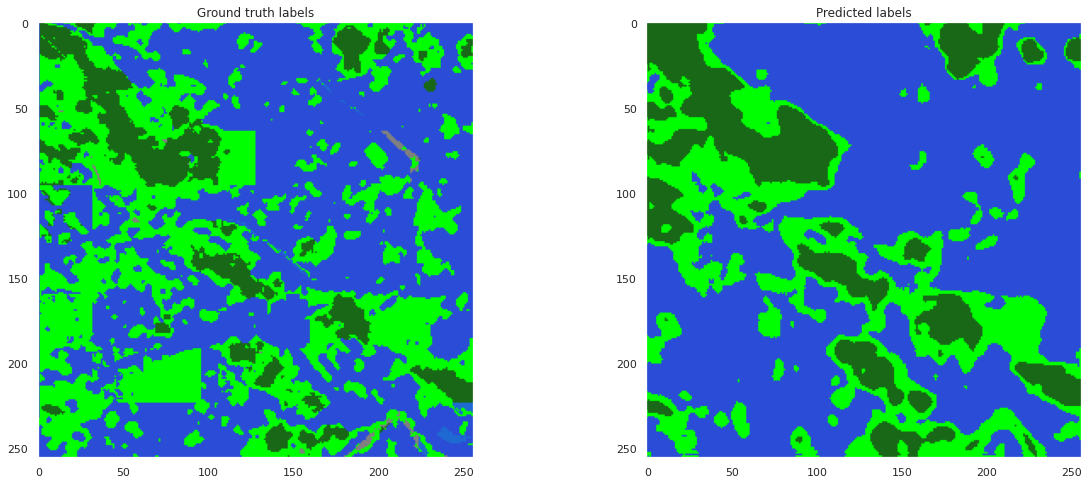

In [ ]:
test_image=X_test[14].reshape(1,256,256,12)
t=y_test[14].reshape(256,256,8)
pred=model.predict(test_image)
pred=pred.reshape(256,256,8)
pred1= np.argmax(pred, axis=-1)
t1=np.argmax(t,axis=-1)
predicted=pred1.reshape(256,256)
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Ground truth labels')
ax1.imshow(onehot_to_rgb(t,transdict))
ax1.grid(b=None)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Predicted labels')
ax2.imshow(onehot_to_rgb(pred,transdict))
ax2.grid(b=None)
plt.show()

# **Test Image 2**

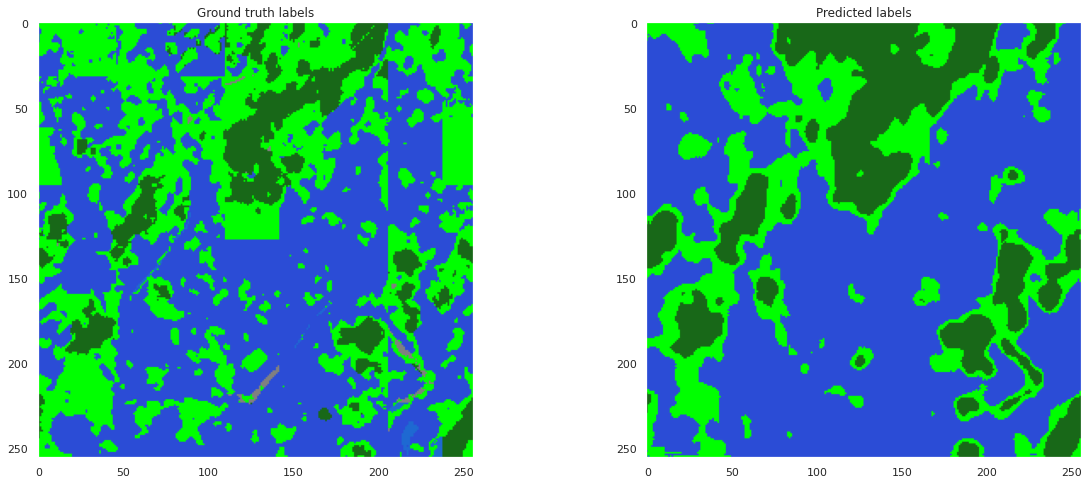

In [ ]:
test_image=X_test[58].reshape(1,256,256,12)
t=y_test[58].reshape(256,256,8)
pred=model.predict(test_image)
pred=pred.reshape(256,256,8)
pred1= np.argmax(pred, axis=-1)
t1=np.argmax(t,axis=-1)
predicted=pred1.reshape(256,256)
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Ground truth labels')
ax1.imshow(onehot_to_rgb(t,transdict))
ax1.grid(b=None)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Predicted labels')
ax2.imshow(onehot_to_rgb(pred,transdict))
ax2.grid(b=None)
plt.show()

# **Test Image 3**

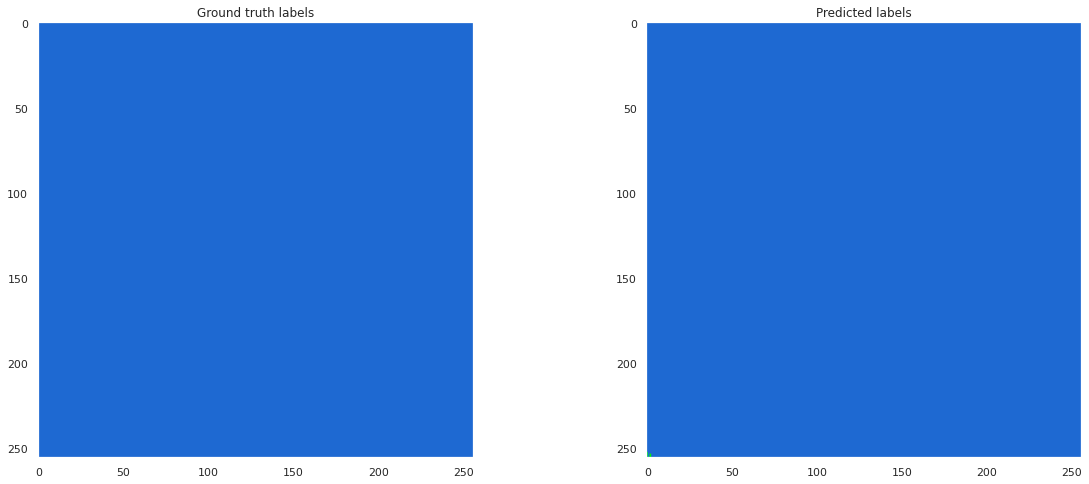

In [ ]:
test_image=X_test[38].reshape(1,256,256,12)
t=y_test[38].reshape(256,256,8)
pred=model.predict(test_image)
pred=pred.reshape(256,256,8)
pred1= np.argmax(pred, axis=-1)
t1=np.argmax(t,axis=-1)
predicted=pred1.reshape(256,256)
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Ground truth labels')
ax1.imshow(onehot_to_rgb(t,transdict))
ax1.grid(b=None)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Predicted labels')
ax2.imshow(onehot_to_rgb(pred,transdict))
ax2.grid(b=None)
plt.show()

# **Test Image 4**

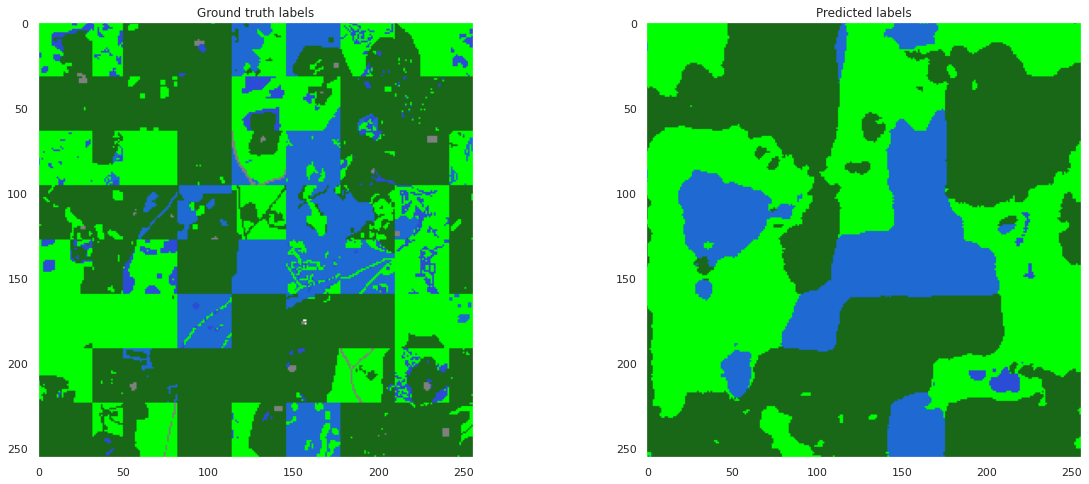

In [ ]:
test_image=X_test[44].reshape(1,256,256,12)
t=y_test[44].reshape(256,256,8)
pred=model.predict(test_image)
pred=pred.reshape(256,256,8)
pred1= np.argmax(pred, axis=-1)
t1=np.argmax(t,axis=-1)
predicted=pred1.reshape(256,256)
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Ground truth labels')
ax1.imshow(onehot_to_rgb(t,transdict))
ax1.grid(b=None)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Predicted labels')
ax2.imshow(onehot_to_rgb(pred,transdict))
ax2.grid(b=None)
plt.show()

# **Test Image 5**

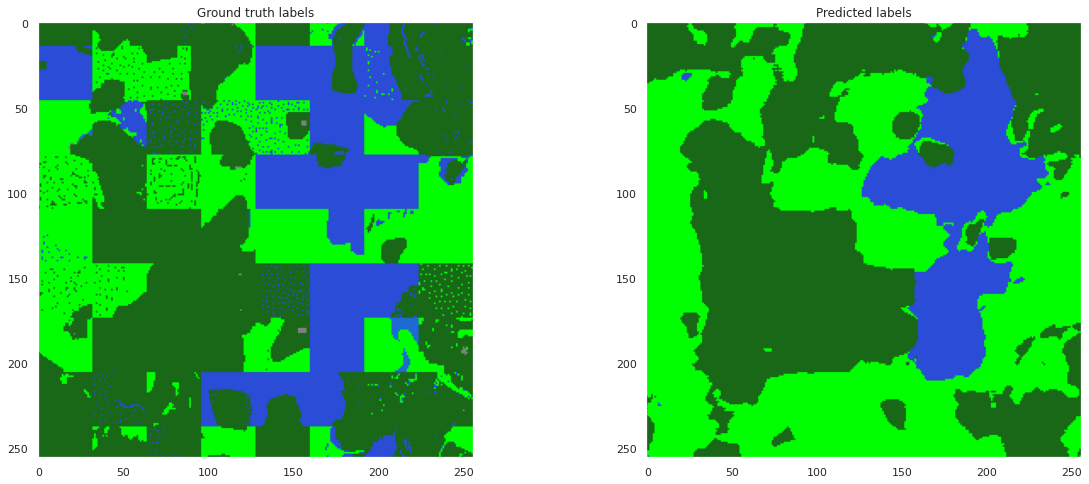

In [ ]:
test_image=X_test[31].reshape(1,256,256,12)
t=y_test[31].reshape(256,256,8)
pred=model.predict(test_image)
pred=pred.reshape(256,256,8)
pred1= np.argmax(pred, axis=-1)
t1=np.argmax(t,axis=-1)
predicted=pred1.reshape(256,256)
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Ground truth labels')
ax1.imshow(onehot_to_rgb(t,transdict))
ax1.grid(b=None)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Predicted labels')
ax2.imshow(onehot_to_rgb(pred,transdict))
ax2.grid(b=None)
plt.show()

# **Test Image 6**

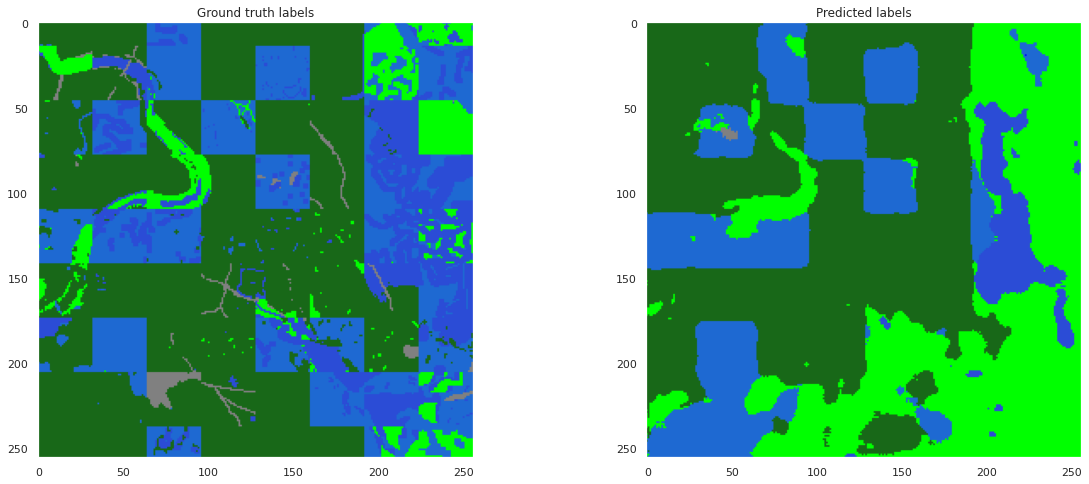

In [ ]:
test_image=X_test[9].reshape(1,256,256,12)
t=y_test[9].reshape(256,256,8)
pred=model.predict(test_image)
pred=pred.reshape(256,256,8)
pred1= np.argmax(pred, axis=-1)
t1=np.argmax(t,axis=-1)
predicted=pred1.reshape(256,256)
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Ground truth labels')
ax1.imshow(onehot_to_rgb(t,transdict))
ax1.grid(b=None)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Predicted labels')
ax2.imshow(onehot_to_rgb(pred,transdict))
ax2.grid(b=None)
plt.show()

# **Test Image 7**

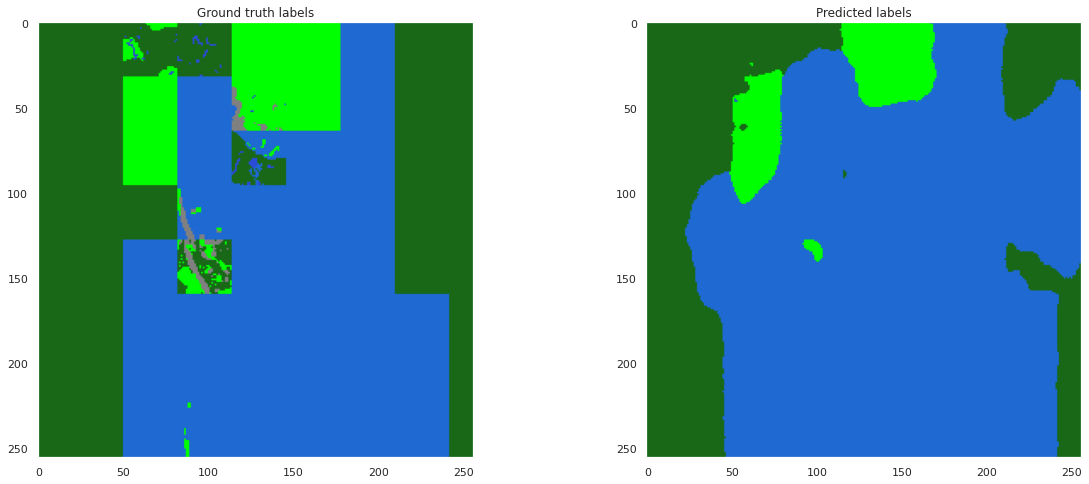

In [ ]:
test_image=X_test[33].reshape(1,256,256,12)
t=y_test[33].reshape(256,256,8)
pred=model.predict(test_image)
pred=pred.reshape(256,256,8)
pred1= np.argmax(pred, axis=-1)
t1=np.argmax(t,axis=-1)
predicted=pred1.reshape(256,256)
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Ground truth labels')
ax1.imshow(onehot_to_rgb(t,transdict))
ax1.grid(b=None)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Predicted labels')
ax2.imshow(onehot_to_rgb(pred,transdict))
ax2.grid(b=None)
plt.show()